**EXERCISE 2** for this exercise we chose binary classification so we have only 0's and 1's

In [798]:
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from numpy import random

iris = datasets.load_iris()
X = iris.data[:-50,:] #100 size
Y = iris.target[:-50] #100 only 0's and 1's
#using model selection, we can fastly split dataset for training and testing ones 80%train 20% test
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state = None)
X_train = np.insert(X_train, 0, 1, axis=1)

In [799]:
def sigmoid(scores):
    return 1 / (1 + np.exp(-scores))

def predict(X, w):
    a =np.matmul(X, w)
    return np.round(sigmoid(a)) #since our output consists only 0's and 1's, we need to round them instead of finding sign

def accuracy(y_pred, y_test, x_size): #function to find accuracy of model
    success = 0
    for i in range(0,len(y_pred)):
        if y_pred[i] == y_test[i]:
            success+=1
    return success*100/x_size

In [800]:
def stochastic_gradient_descent(x, y, learning_rate, T): #function to minimize error with updated weight
    Error = []
    w = np.zeros(shape = (T, x.shape[1]))
    for t in range(1, T):
        index = np.random.randint(1, x.shape[0])
        gradient = (2*y[index]*x[index])/(1+np.exp(y[index]*(2*np.transpose(w[t-1])*x[index])))
        error = np.log(1+np.exp(y[index]*(2*np.transpose(w[t-1])*x[index])))
        w[t] = w[t-1] - learning_rate* gradient
        Error.append(error[3])
    return Error

In [801]:
err1 = stochastic_gradient_descent(X_train, Y_train, 0.001, 2000) #error for E in
err2 = stochastic_gradient_descent(X_test, Y_test, 0.001, 2000) #error for E out

In [802]:
e_in = []
e_out=[]
bug = 0.6931471805599453 #We noticed the point that repeats all over the error and affects graph, so we decided to ignore it
for i in range(0,1999):
    if err1[i]!=bug:
        e_in.append(err1[i])
    i+=500 #iterations to decrease amount of data ; not affecting graph
for i in range(0,1999):
    if err2[i]!=bug:
        e_out.append(err2[i])
    i+=500

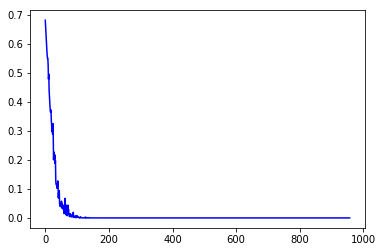

In [803]:
t = np.arange(1, 2000);
plt.plot(e_in, 'b', label = 'train')
plt.show()

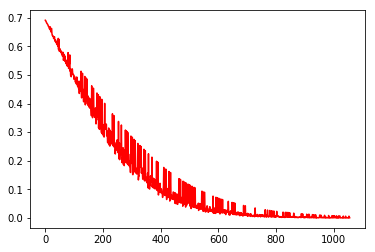

In [813]:
plt.plot(e_out, 'r', label = 'test')
plt.show()

**Logistic Regression Ein, Eout

Conclusion:

   By repeating the experiment several times, we noticed that Error for training data decreases faster that Error for testing data, that is because we think the size of training data is bigger that testing one.
Possible limitations: 
   1.For very large data it has higher error at the beginning 
   2.

In [815]:
def logistic_regression_algorithm(X, y, learning_rate, T):
    w = np.zeros(shape = (X.shape[1],1))
    m = len(y)
    for i in range(T):
        gradient = np.matmul(X.T,sigmoid(np.matmul(X,w)) - y)
        w = w - (learning_rate/m) * gradient 
    return w
w = logistic_regression_algorithm(X_train, Y_train, 0.001, 2000)
y_pred = predict(X_train, w)
print("CHECKING...")
print("Y_PRED result:")
print(y_pred[0])
print("Y result: ")
print(Y_train)
print("Accuracy:" ,accuracy(y_pred[0],Y_train, X_train.shape[0]),"%")

CHECKING...
Y_PRED result:
[0. 0. 0. 1. 1. 1. 0. 1. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 1. 1. 1. 1.
 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1. 0. 0. 1. 0. 0.
 0. 1. 0. 1. 1. 0. 0. 0.]
Y result: 
[0 0 0 1 1 1 0 1 0 1 1 0 0 0 0 0 1 1 0 0 1 1 1 1 1 0 1 1 0 1 0 0 1 0 0 0 1
 1 1 0 0 0 0 1 1 1 0 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 0 1 0 0 1 0 0 0 1
 0 1 1 0 0 0]
('Accuracy:', 100, '%')


Here we are using sigmoid function and updating weight. Since we have binary classification problem our predict function does: if np.dot(X_train, w) >0.5 it rounds to 1 else to 0. Then, we got multiple resulting arrays, so we can choose any of them. So, checking y_pred[0] with Y_train gives us 100% accuracy!